# Problem 2

In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [116]:
data = pd.read_csv('data/adult.data',header=None)
data.to_csv('data/adult.csv', index=False)
data.rename(columns={0:"age",1:"workclass",2:"fnlwgt",3: "education",4:"education-num",5:"marital-status",6:"occupation",7:"relationship",8:"race",9:"sex",10:"capital-gain",11:"capital-loss",12:"hours-per-week",13:"native-country",14:"income"},inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
def check_df(dataframe, head=10):
    '''
    Provides general information about the loaded data.

    Parameters
    ----------
    dataframe: dataframe
    head: int

    Notes
    ----------
    The head value is set to a constant 5.
    '''
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Corr #####################")
    print(dataframe.corr())
    print("##################### Describe #####################")
    print(dataframe.describe())

check_df(data)

##################### Shape #####################
(32561, 15)
##################### Types #####################
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
##################### Head #####################
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6 

### a.	capital-gain için histogram grafiği çizin. Grafiğin şekli hakkında yorum yapınız.

array([[<AxesSubplot:title={'center':'capital-gain'}>]], dtype=object)

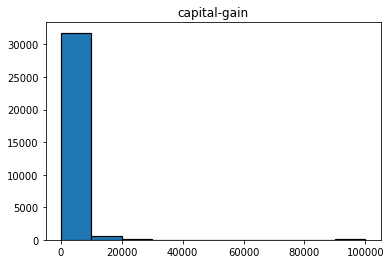

In [118]:
data.hist(column='capital-gain',grid=False,edgecolor='black', linewidth=1.2)

### b.	Veri setindeki yerel ülke değişkenine dayalı kategorik bir “kıta” değişkeni oluşturun, her gözlemi tek tek gözden geçirin ve her gözlemi “Kuzey Amerika”, “Güney Amerika”, “Avrupa” kategorilerinden birine atayınız. “Asya”, “Avustralya”, “Afrika”. Bunu yapmak için, döngüler ve koşullu ifadeler için kullanınız.

In [119]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [120]:
Asia = [' China',' Hong',' India',' Iran',' Cambodia',' Japan', ' Laos' , ' Philippines' ,' Vietnam' ,' Taiwan', ' Thailand']
North_America = [' Canada',' United-States',' Puerto-Rico',' Cuba',' El-Salvador',' Dominican-Republic',' Guatemala',' Haiti',' Honduras', ' Mexico',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Jamaica']
Europe = [' England' ,' France', ' Germany' ,' Greece',' Holand-Netherlands',' Hungary', ' Ireland',' Italy',' Poland',' Portugal',' Scotland',' Yugoslavia']
South_America = [' Columbia',' Ecuador',' Peru',' Trinadad&Tobago']
South_Africa = [' South']
No_Information = [' ?']

In [121]:
def add_continents(data):
    '''
    Adds a new column to the dataframe that shows the continent information of the countries.

    Parameters
    ----------
    dataframe: dataframe

    Returns
    ----------
    dataframe: dataframe
    '''

    data['continent'] =  ""

    for i in range(data.shape[0]):
        if data['native-country'][i] in Asia:
            data['continent'][i] = 'Asia'
        elif data['native-country'][i] in North_America:
            data['continent'][i] = 'North America'
        elif data['native-country'][i] in Europe:
            data['continent'][i] = 'Europe'
        elif data['native-country'][i] in South_America:
            data['continent'][i] = 'South America'
        elif data['native-country'][i] in South_Africa:
            data['continent'][i] = 'South Africa'
        elif data['native-country'][i] in No_Information:
            data['continent'][i] = 'No Information'
        else:
            data['continent'][i] = 'Other'
    
    return data

data = add_continents(data)
data.head()

C:\Users\enes_\AppData\Local\Temp\ipykernel_7292\4036826298.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['continent'][i] = 'North America'
C:\Users\enes_\AppData\Local\Temp\ipykernel_7292\4036826298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['continent'][i] = 'Asia'
C:\Users\enes_\AppData\Local\Temp\ipykernel_7292\4036826298.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['continent'][i] = 'No Info

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North America


#### c. Ardından, yeni oluşturulan “kıta” değişkeninin frekanslarını gösteriniz ve bu kıtaların her birinden kaç kişinin olduğunu gösteriniz.

In [128]:
data['continent'].value_counts()


North America     30569
Asia                671
No Information      583
Europe              521
South America       137
South Africa         80
Name: continent, dtype: int64

#### d. "Kıta" değişkeni için bar grafiği çiziniz.

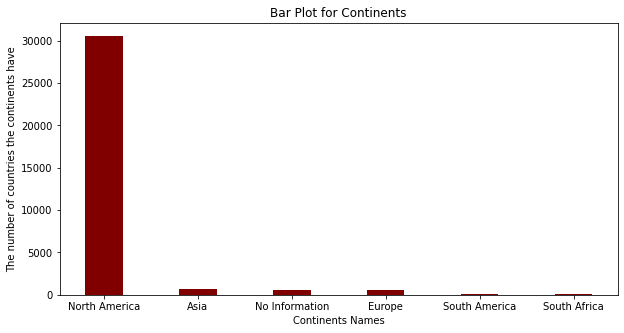

In [129]:
continents_count =  data['continent'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(continents_count.index, continents_count.values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Continents Names")
plt.ylabel("The number of countries the continents have")
plt.title("Bar Plot for Continents")
plt.show()